In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# DATA PREPROCESSING

In [98]:
data = pd.read_csv(r'C:\Users\gameg\OneDrive\Desktop\data science final product\Life Expectancy Data.csv')
pd.set_option('display.max_columns', None)
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0      19.1                  83    6.0               8.16         65.0   
1      18.6                  86   58.0               8.18         62.0   
2      18.1                  89   62.0               8.13         64.0   
3      17.6                  93   67.0               8.52         67.0   
4      17.2                  97   68.0               7.87         68.0   
...     ...                 ...    ...                ...          ...   
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
0           0.1  584.259210  33736494.0                   17.2   
1           0.1  612.696514    327582.0                   17.5   
2           0.1  631.744976  31731688.0                   17.7   
3           0.1  669.959000   3696958.0                   17.9   
4           0.1   63.537231   2978599.0                   18.2   
...         ...         ...         ...                    ...   
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
0                    17.3                            0.479       10.1  
1                    17.5                            0.476       10.0  
2                    17.7                            0.470        9.9  
3                    18.0                            0.463        9.8  
4                    18.2                            0.454        9.5  
...                   ...                              ...

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [100]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [101]:
data.shape

(2938, 22)

In [102]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [103]:
#Dropped The Highest Missing values in a column.
data.dropna(subset=['Population', 'Hepatitis B'], inplace=True)
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0      19.1                  83    6.0               8.16         65.0   
1      18.6                  86   58.0               8.18         62.0   
2      18.1                  89   62.0               8.13         64.0   
3      17.6                  93   67.0               8.52         67.0   
4      17.2                  97   68.0               7.87         68.0   
...     ...                 ...    ...                ...          ...   
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
0           0.1  584.259210  33736494.0                   17.2   
1           0.1  612.696514    327582.0                   17.5   
2           0.1  631.744976  31731688.0                   17.7   
3           0.1  669.959000   3696958.0                   17.9   
4           0.1   63.537231   2978599.0                   18.2   
...         ...         ...         ...                    ...   
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
0                    17.3                            0.479       10.1  
1                    17.5                            0.476       10.0  
2                    17.7                            0.470        9.9  
3                    18.0                            0.463        9.8  
4                    18.2                            0.454        9.5  
...                   ...                              ...

In [104]:
columns_to_fill = ['Life expectancy ', 'Adult Mortality', 'Alcohol',' BMI ', 'Polio',
    'Total expenditure','Diphtheria ', 'GDP',' thinness  1-19 years',' thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

In [105]:
for column in columns_to_fill:
        data[column].fillna(data[column].mean(), inplace=True)

In [106]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [107]:
data.sample(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
240       Belgium  2015   Developed              81.1             74.0   
2025  Philippines  2013  Developing              68.1            219.0   
1058    Guatemala  2015  Developing              71.9            186.0   
1971       Panama  2003  Developing              75.5            126.0   
829   El Salvador  2004  Developing              70.0            215.0   

      infant deaths   Alcohol  percentage expenditure  Hepatitis B  Measles   \
240               0  4.483782                0.000000         98.0        47   
2025             55  4.610000               24.589734         89.0      2920   
1058             10  4.483782                0.000000         74.0         0   
1971              1  5.520000               58.459760         98.0         0   
829               3  2.900000              398.605832          9.0         0   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
240    63.7                   1   99.0           5.958352         99.0   
2025   24.3                  69   84.0           4.560000         89.0   
1058    5.6                  12    9.0           5.958352         74.0   
1971   48.6                   2   95.0           7.600000         98.0   
829    48.6                   3    9.0           7.300000          9.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
240         0.1  4356.875000  11274196.0                    1.0   
2025        0.1   276.289146   9848132.0                    1.0   
1058        0.4  3923.573344  16252429.0                    1.2   
1971        0.1  4267.135780    329174.0                    2.2   
829         0.3  2632.799420      6775.0                    1.9   

       thinness 5-9 years  Income composition of resources  Schooling  
240                   1.0                            0.895       16.6  
2025                  9.7                            0.671       11.7  
1058                  1.2                            0.637       10.7  
1971                  2.2                            0.728       12.8  
829                   1.8                            0.636       12.4

In [108]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [109]:
data['status'] = np.where(data['Status'] == 'Developing',0,1)

In [110]:
data.sample(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
1478   Lesotho  2011  Developing              52.3             52.0   
419    Burundi  2012  Developing              58.0            312.0   
1593  Malaysia  2008  Developing              73.8            132.0   
54      Angola  2009  Developing              49.1            369.0   
1014     Ghana  2011  Developing              61.2            263.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1478              4     2.39              195.825251         96.0       172   
419              22     0.01               38.731705         96.0        49   
1593              3     0.47              438.451921         97.0       334   
54               81     7.01              212.922933         61.0      2807   
1014             40     1.64              225.221947         91.0       120   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
1478    3.2                   6   95.0              11.79         96.0   
419    17.1                  33   96.0               8.21         96.0   
1593   33.4                   4   97.0               3.47         97.0   
54     19.8                 127   63.0               4.37          6.0   
1014   26.1                  58   91.0               4.81         91.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
1478       10.5  1352.384330    264166.0                    6.8   
419         1.2   265.285651    931971.0                    7.5   
1593        0.1  8513.629541   2711169.0                    8.5   
54          2.5  3347.844850  22549547.0                    9.3   
1014        1.3  1574.978653  25121796.0                    6.9   

       thinness 5-9 years  Income composition of resources  Schooling  status  
1478                  6.6                            0.469       11.0       0  
419                   7.5                            0.393       10.3       0  
1593                  8.3                            0.747       12.5       0  
54                    9.2                            0.480        8.5       0  
1014                  6.8                            0.554       10.9       0

# DATA PREPROCESSING END

# Machine Learning

In [111]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  status  
0                 17.3                            0.479       10.1       0  
1                 17.5                            0.476       10.0       0  
2                 17.7                            0.470        9.9       0  
3                 18.0                            0.463        9.8       0  
4                 18.2                            0.454        9.5       0

#### to convert categorical variables into numberical

In [112]:
data = pd.get_dummies(data, columns=['Status'])

#### to split data set into features

In [113]:
X = data.drop(['Life expectancy ','Country'], axis=1)
y = data['Life expectancy ']

In [114]:
X.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  \
0         65.0      1154   19.1                  83    6.0               8.16   
1         62.0       492   18.6                  86   58.0               8.18   
2         64.0       430   18.1                  89   62.0               8.13   
3         67.0      2787   17.6                  93   67.0               8.52   
4         68.0      3013   17.2                  97   68.0               7.87   

   Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0         65.0        0.1  584.259210  33736494.0                   17.2   
1         62.0        0.1  612.696514    327582.0                   17.5   
2         64.0        0.1  631.744976  31731688.0                   17.7   
3         67.0        0.1  669.959000   3696958.0                   17.9   
4         68.0        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  status  \
0                 17.3                            0.479       10.1       0   
1                 17.5                            0.476       10.0       0   
2                 17.7                            0.470        9.9       0   
3                 18.0                            0.463        9.8       0   
4                 18.2                            0.454        9.5       0   

   Status_Developed  Status_Developing  
0             False               True  
1             False               True  
2             False               True  
3             False               True  
4             False               True

In [115]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

### split data set into training and testing sets

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

test-split-train for (KNN)
Feature Scaling for sensetive algorithm (KNN)

In [117]:
# Define thresholds for classification
thresholds = [60, 70, 80]

y_train_class = pd.cut(y_train, bins=[-float('inf')] + thresholds + [float('inf')], labels=[0, 1, 2, 3])
y_test_class = pd.cut(y_test, bins=[-float('inf')] + thresholds + [float('inf')], labels=[0, 1, 2, 3])

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.25      0.85      0.38       102
           1       0.43      0.08      0.14       159
           2       0.69      0.39      0.50       244
           3       0.80      0.43      0.56        37

    accuracy                           0.39       542
   macro avg       0.54      0.44      0.39       542
weighted avg       0.54      0.39      0.37       542

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       102
           1       0.84      0.85      0.85       159
           2       0.91      0.94      0.93       244
           3       0.92      0.89      0.90        37

    accuracy                           0.89       542
   macro avg       0.90      0.88      0.89       542
weighted avg       0.90      0.89      0.89       542

K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-scor

#### Visualizations

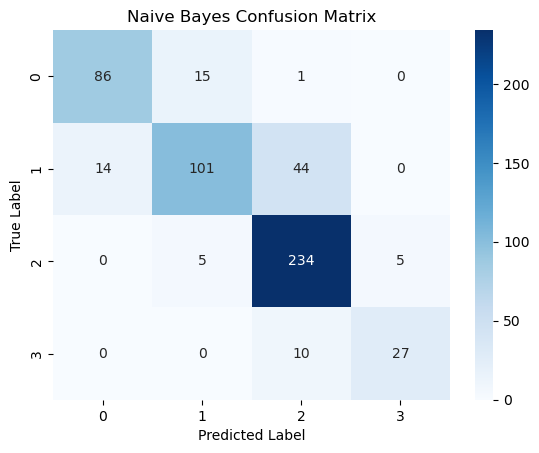

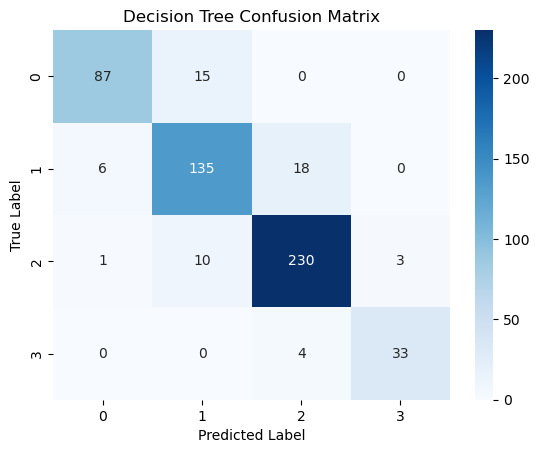

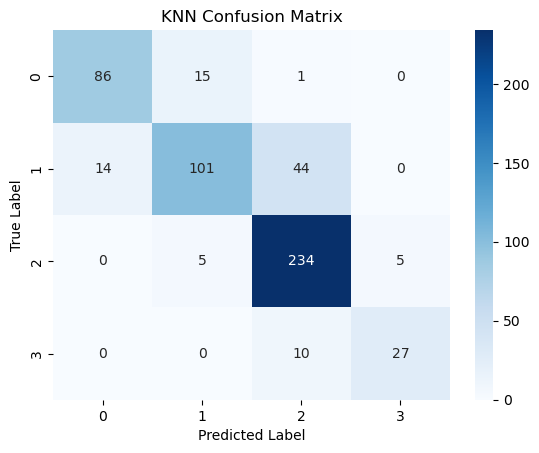

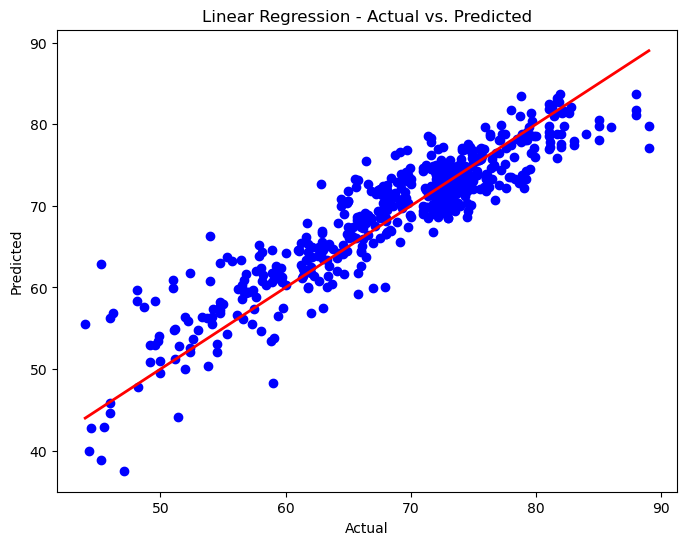

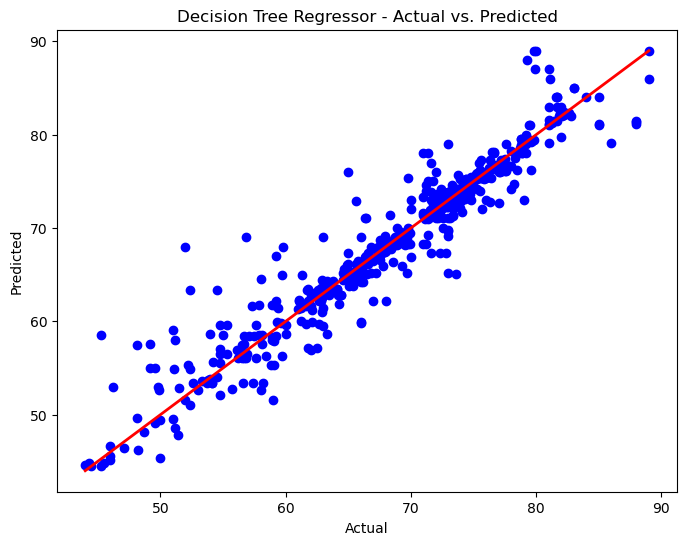

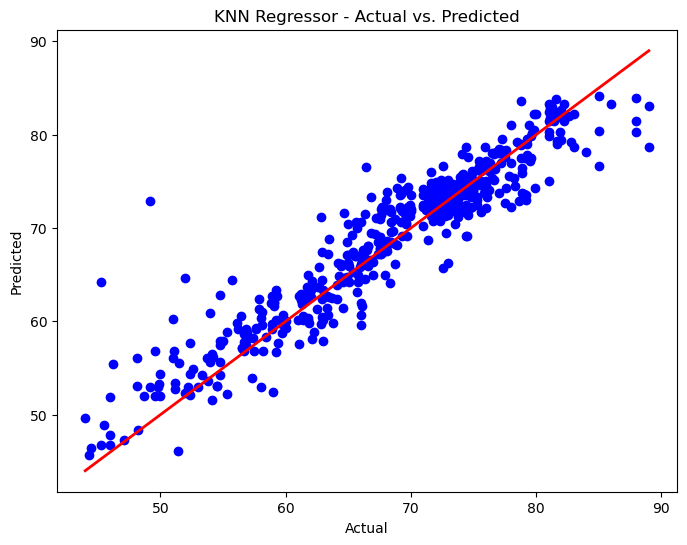

In [122]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_regression_results(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)],color='red' , lw=2)
    plt.title(f'{model_name} - Actual vs. Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test_class, y_pred, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(y_test_class, dt_pred, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(y_test_class, knn_pred, 'KNN Confusion Matrix')

plot_regression_results(y_test, lr_pred, 'Linear Regression')
plot_regression_results(y_test, dt_reg_pred, 'Decision Tree Regressor')
plot_regression_results(y_test, knn_reg_pred, 'KNN Regressor')


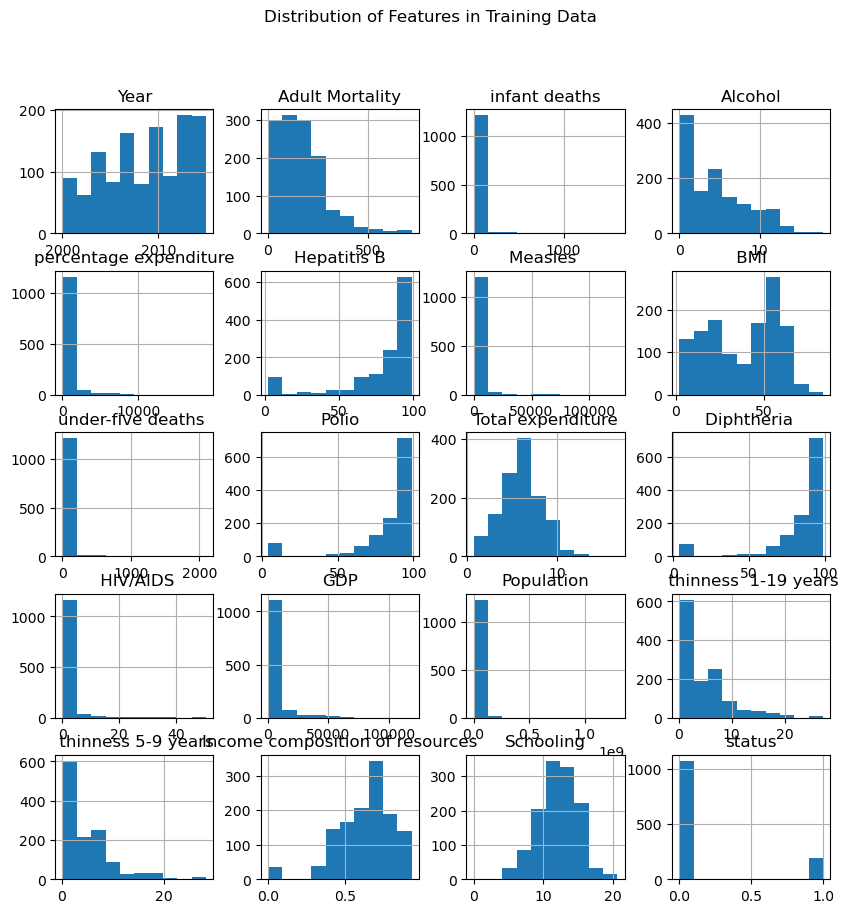

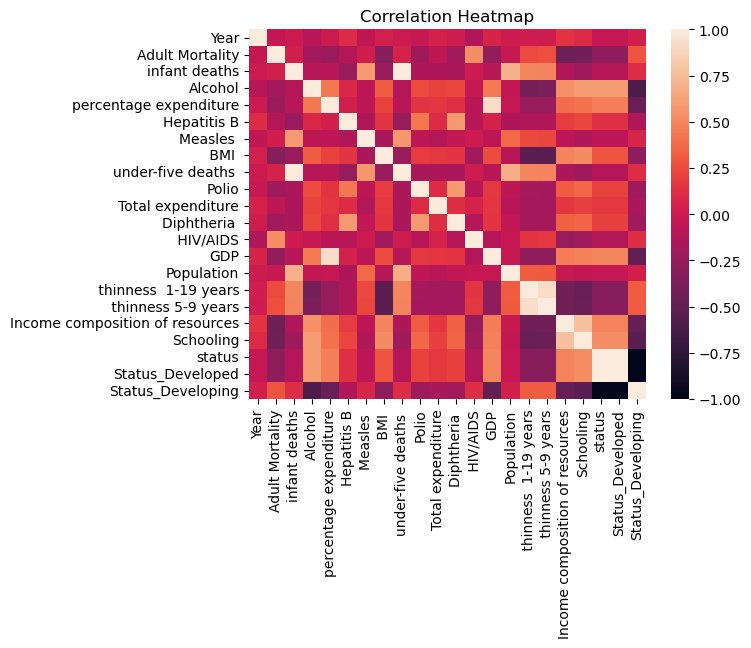

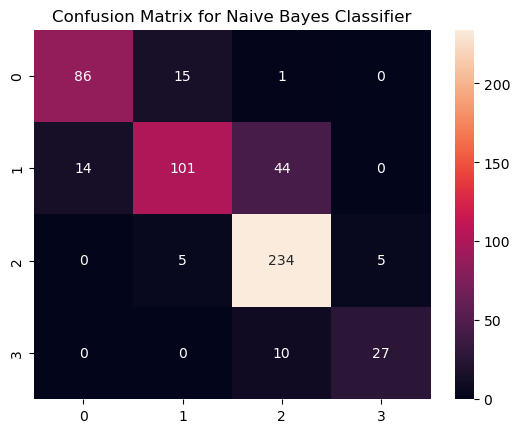

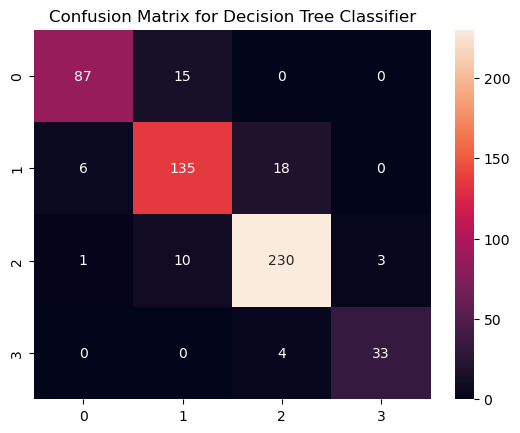

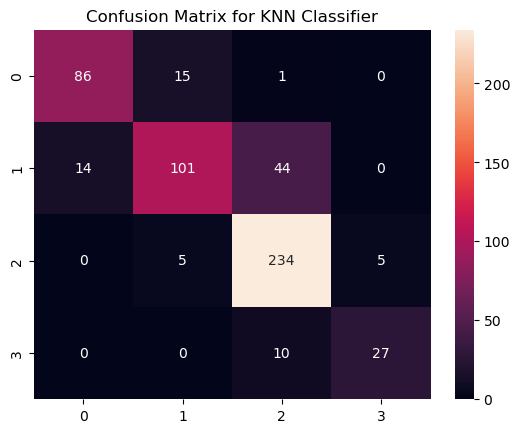

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\gameg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


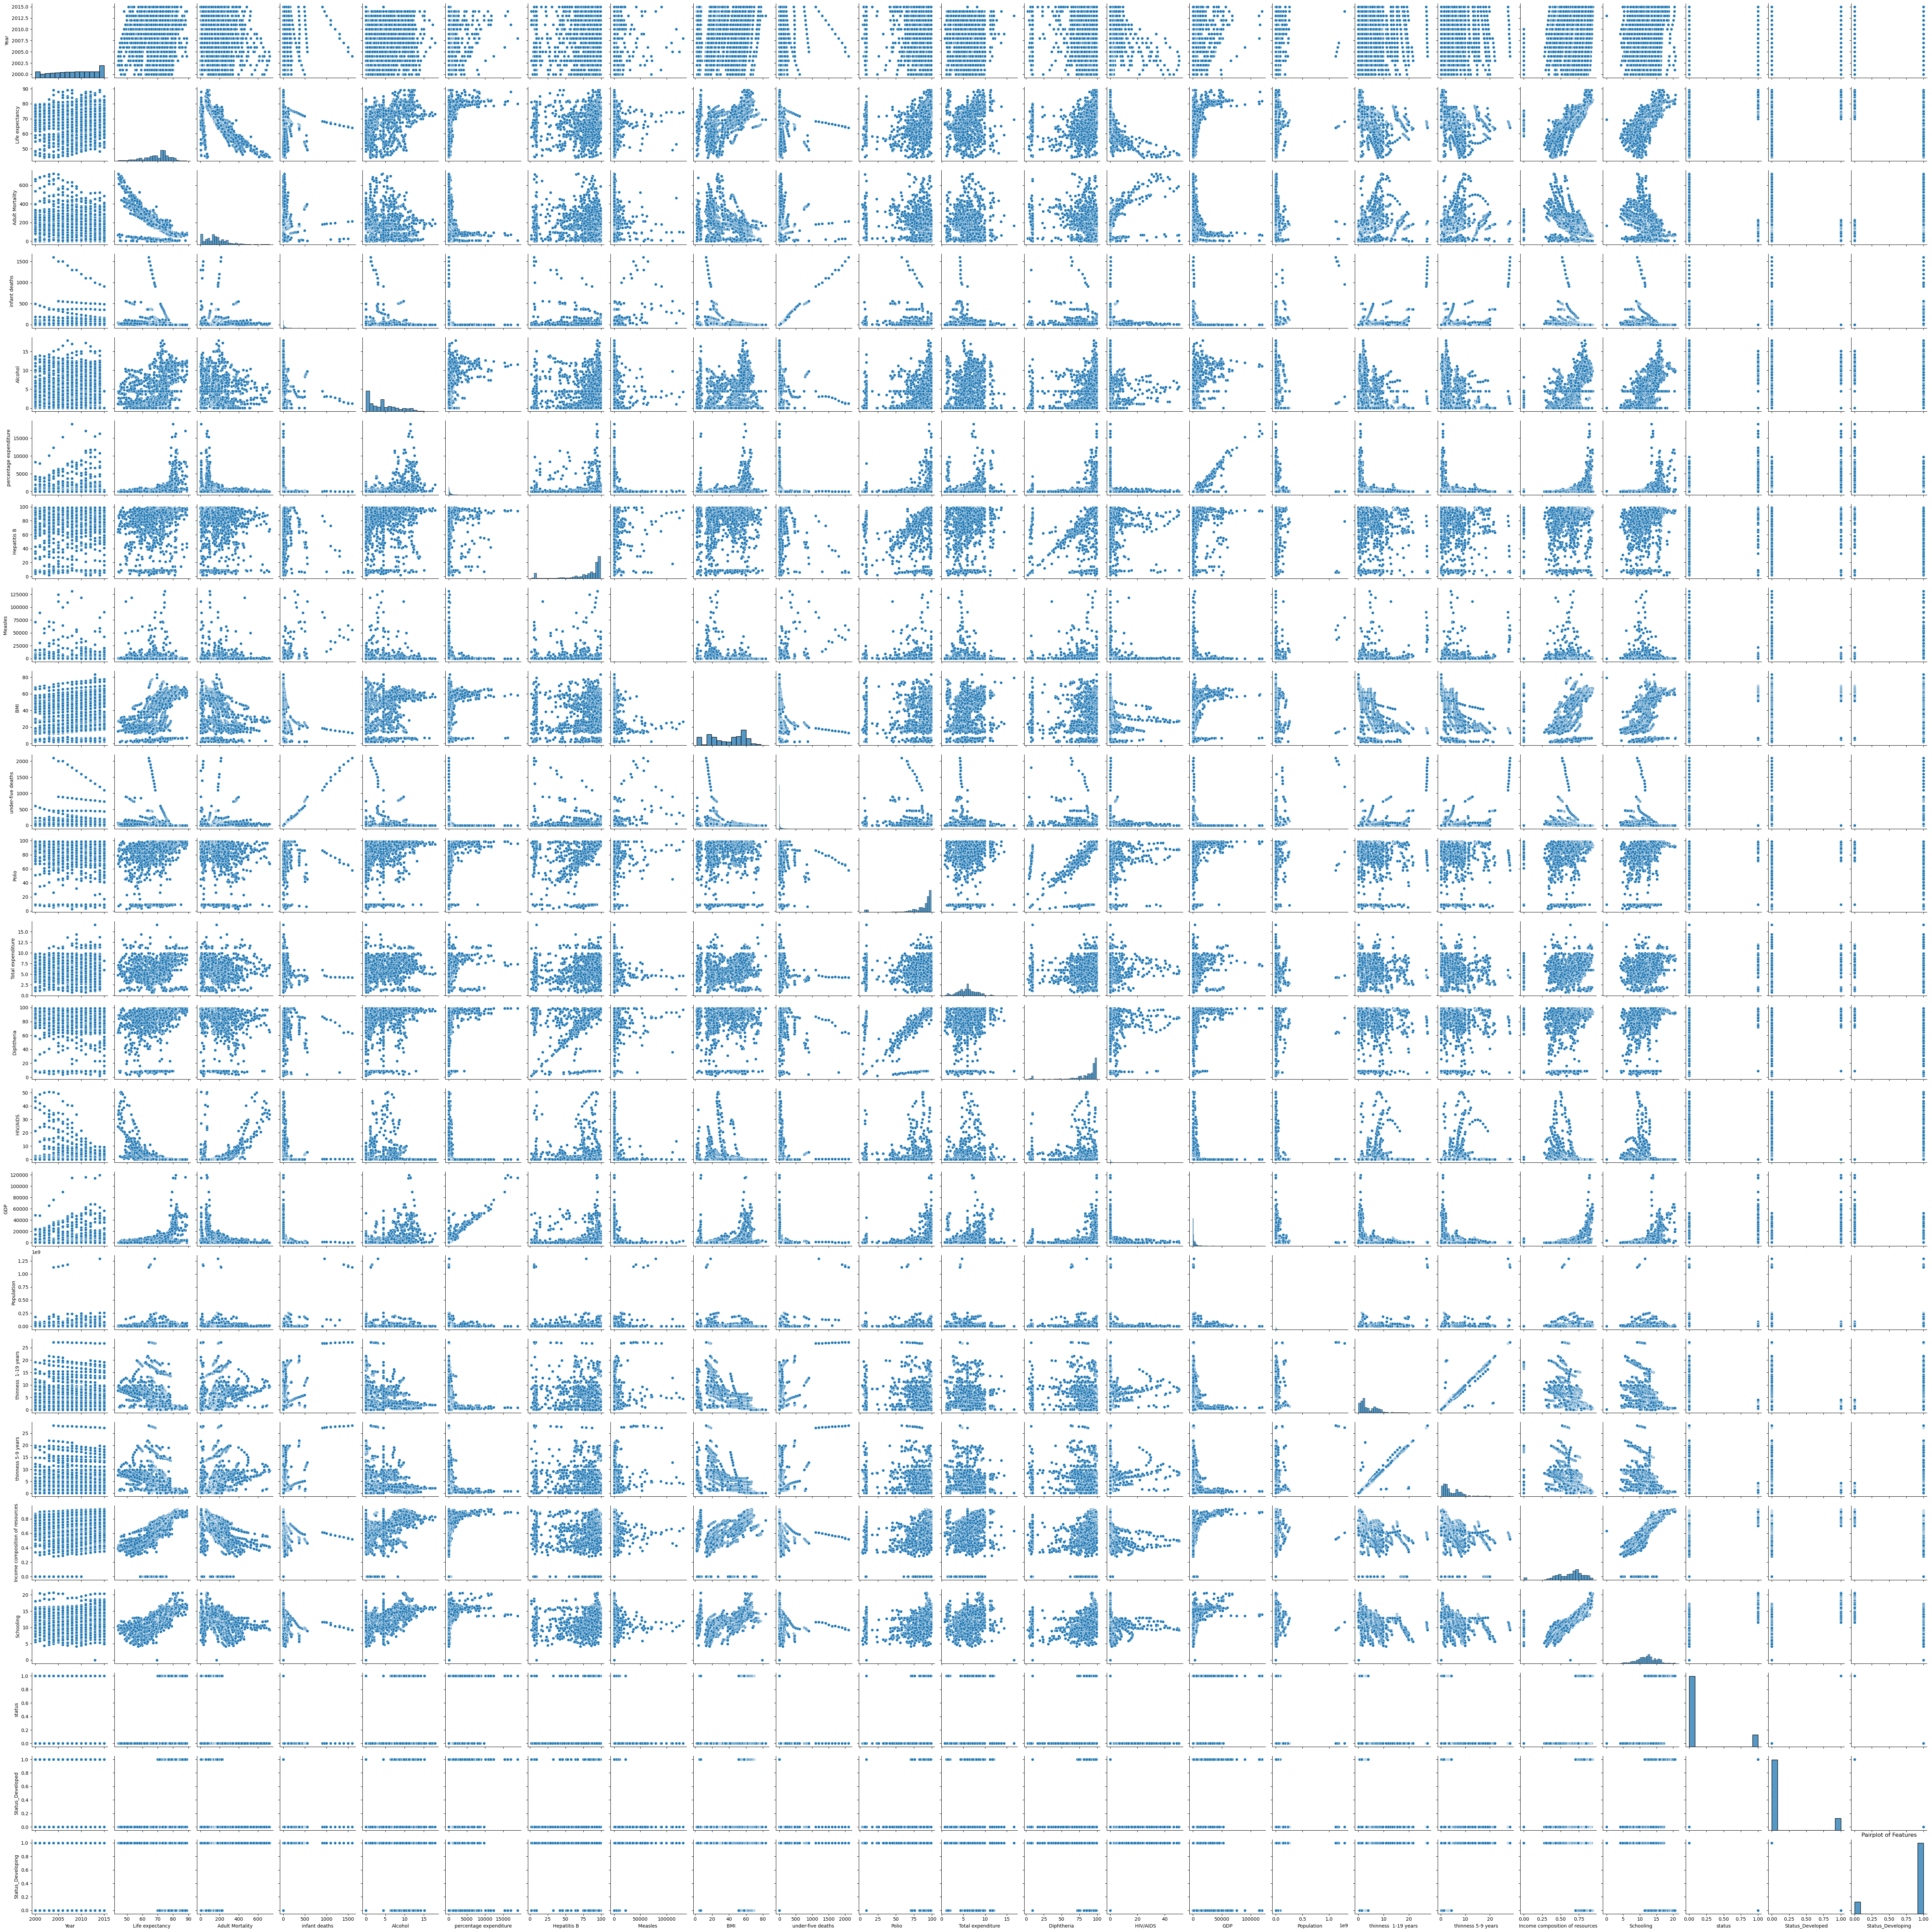

In [123]:
# Histograms
X_train.hist(figsize=(10, 10))
plt.suptitle("Distribution of Features in Training Data")
plt.show()

# Heat Map
corr = X_train.corr()
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Confusion matrix
y_test_class = pd.cut(y_test, bins=[-float('inf')] + thresholds + [float('inf')], labels=[0, 1, 2, 3])
for clf_name, y_pred in [("Naive Bayes", y_pred), ("Decision Tree", dt_pred), ("KNN", knn_pred)]:
    cm = confusion_matrix(y_test_class, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix for {clf_name} Classifier")
    plt.show()
    
# Pairplot
sns.pairplot(data)
plt.title("Pairplot of Features")
plt.show()

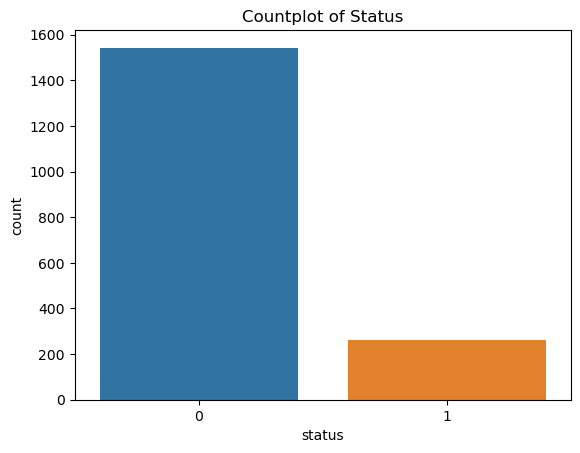

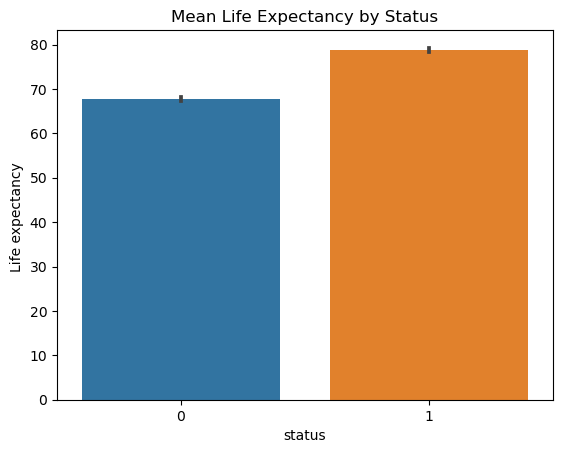

C:\Users\gameg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


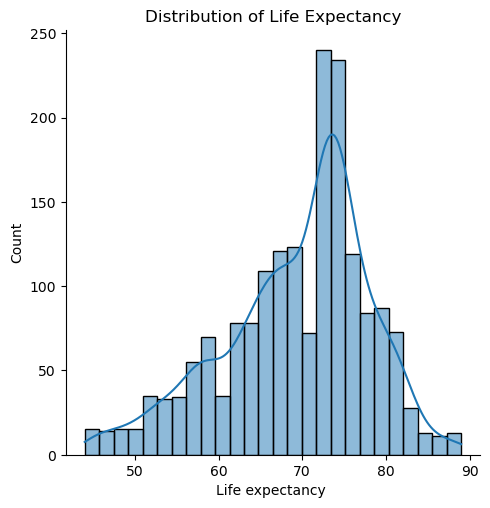

In [124]:
# Countplot for 'Status'
sns.countplot(x='status', data=data)
plt.title("Countplot of Status")
plt.show()

# Barplot for mean 'Life expectancy ' by 'status'
sns.barplot(x='status', y='Life expectancy ', data=data)
plt.title("Mean Life Expectancy by Status")
plt.show()

# Displot for 'Life expectancy '
sns.displot(data['Life expectancy '], kde=True)
plt.title("Distribution of Life Expectancy")
plt.show()

#### Training and Evaluating

##### for classification

In [126]:
# Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train_class)
y_pred = clf.predict(X_test)

print("Naive Bayes Classifier:")
print(classification_report(y_test_class, y_pred))

# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train_class)
dt_pred = dt_clf.predict(X_test)

print("Decision Tree Classifier:")
print(classification_report(y_test_class, dt_pred))

# K-Nearest Neighbors (KNN)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train_class)
knn_pred = knn_clf.predict(X_test_scaled)

print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test_class, knn_pred))

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.25      0.85      0.38       102
           1       0.43      0.08      0.14       159
           2       0.69      0.39      0.50       244
           3       0.80      0.43      0.56        37

    accuracy                           0.39       542
   macro avg       0.54      0.44      0.39       542
weighted avg       0.54      0.39      0.37       542

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       102
           1       0.85      0.86      0.85       159
           2       0.92      0.92      0.92       244
           3       0.82      0.89      0.86        37

    accuracy                           0.89       542
   macro avg       0.88      0.89      0.88       542
weighted avg       0.89      0.89      0.89       542

K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-scor

##### for prediction

In [127]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))

# polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

print("\nPolynomial Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, poly_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, poly_pred))
print("R2 Score:", r2_score(y_test, poly_pred))

# Decision Tree Regressor
dt_reg_model = DecisionTreeRegressor()
dt_reg_model.fit(X_train, y_train)
dt_reg_pred = dt_reg_model.predict(X_test)

print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, dt_reg_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, dt_reg_pred))
print("R2 Score:", r2_score(y_test, dt_reg_pred))

# K-Nearest Neighbors (KNN) Regressor
knn_reg_model = KNeighborsRegressor()
knn_reg_model.fit(X_train_scaled, y_train)
knn_reg_pred = knn_reg_model.predict(X_test_scaled)

print("\nK-Nearest Neighbors (KNN) Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, knn_reg_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_reg_pred))
print("R2 Score:", r2_score(y_test, knn_reg_pred))

Linear Regression:
Mean Squared Error: 12.99371627629033
Mean Absolute Error: 2.7396191644157764
R2 Score: 0.8382282523247588

Polynomial Regression:
Mean Squared Error: 8.333429814961036
Mean Absolute Error: 2.007040971143659
R2 Score: 0.8962488116078757

Decision Tree Regressor:
Mean Squared Error: 7.149354243542434
Mean Absolute Error: 1.5389298892988927
R2 Score: 0.91099055065273

K-Nearest Neighbors (KNN) Regressor:
Mean Squared Error: 9.441159409594091
Mean Absolute Error: 2.095387453874538
R2 Score: 0.8824575798566976
